In [1]:
# Import stuff
import os
import scipy
import scipy.stats as stats
import pymc3 as pm
import theano.tensor as tt
import theano

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

In [2]:
test = np.arange(9)
print(test[::-1])

[8 7 6 5 4 3 2 1 0]


In [3]:
with pm.Model() as test_model:
    x = pm.Uniform('x',0,1,shape = 2)
    #x_sort = pm.Deterministic('x_sort',pm.math.switch(pm.math.gt(x[0],x[1]),x[::-1],x))
    x_sort = pm.Deterministic('x_sort', x.sort())
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:00<00:00, 5677.36draws/s]


In [4]:
x_samples = trace['x_sort'].T
print(x_samples.shape)

(2, 2000)


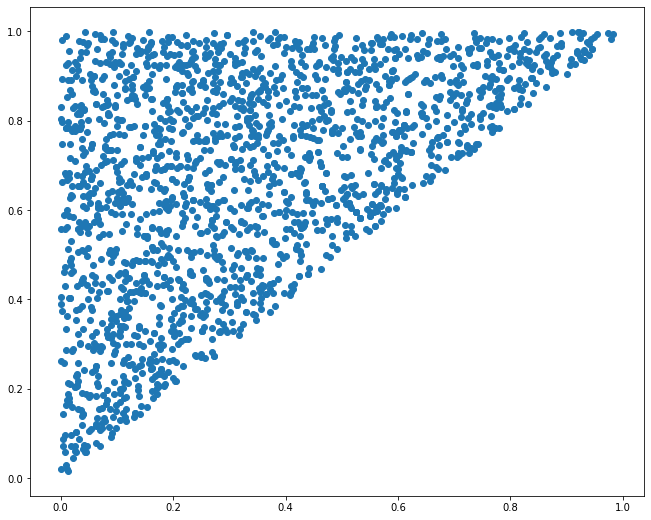

In [5]:
plt.scatter(x_samples[0],x_samples[1]);